## coil compression 
###### Author: Zimu Huo
###### Date: 05.2022



-------------------------------------------------------------------------
References
    
    [1] 
    Author: Tao Zhang et al.
    Title: Coil compression for accelerated imaging with Cartesian sampling
    Link: https://pubmed.ncbi.nlm.nih.gov/22488589/
    
   

In [10]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import util.coil as coil
from util.fft import *
import numpy as np

In [11]:
data = np.load('../lib/single_slice.npy')
[ny, nx, nc] = data.shape

In [12]:
data = data.reshape(-1, nc)

In [13]:
s, u, vt = np.linalg.svd(data.T, full_matrices=False)
u = np.diag(u)

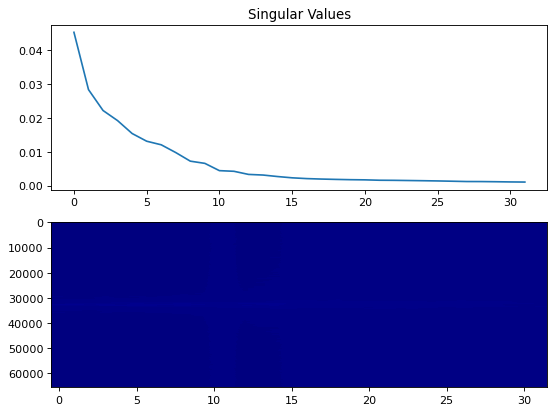

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
plt.plot(np.diag(u))
plt.title('Singular Values')
plt.subplot(2,1,2)
plt.imshow(np.abs(np.transpose(vt)),aspect='auto', cmap = "jet")
plt.show()

In [15]:
new = data@ vt[:,:15]

In [16]:
new = new.reshape(256, 256, -1)

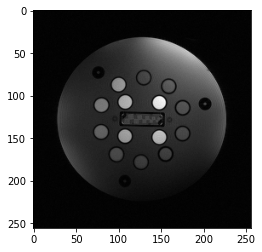

In [9]:
show(coil.rsos(ifft2c(new)))